<a href="https://colab.research.google.com/github/nhquynhhh/IS403_O21_2/blob/week6_hoangmanhthang/Model/RNN/DXG_RNN_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# 1. Import thư viện cần thiết
# from google.colab import drive
# drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [34]:
# 2. Đọc file csv
df = pd.read_csv('DXG-Historical-Data.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,"6,066.50","6,191.40","6,191.40","6,041.60",494.17K,-2.80%
1,1/4/2017,"6,166.40","6,066.50","6,191.40","6,041.60",2.04M,1.65%
2,1/5/2017,"6,091.50","6,191.40","6,191.40","6,091.50",2.31M,-1.21%
3,1/6/2017,"6,141.40","6,141.40","6,291.20","6,141.40",4.07M,0.82%
4,1/9/2017,"6,141.40","6,141.40","6,266.30","6,141.40",2.86M,0.00%
...,...,...,...,...,...,...,...
1843,5/27/2024,"16,550.00","16,700.00","16,800.00","16,450.00",6.06M,-0.90%
1844,5/28/2024,"16,800.00","16,750.00","16,950.00","16,650.00",5.13M,1.51%
1845,5/29/2024,"16,850.00","16,850.00","17,150.00","16,750.00",8.48M,0.30%
1846,5/30/2024,"16,850.00","16,650.00","16,900.00","16,500.00",8.31M,0.00%


In [35]:

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Loại bỏ dấu phẩy từ cột "Price"
df['Price'] = df['Price'].str.replace(',', '').astype(float)
# Loại bỏ dấu phẩy từ cột "Open"
df['Open'] = df['Open'].str.replace(',', '').astype(float)
# Loại bỏ dấu phẩy từ cột "High"
df['High'] = df['High'].str.replace(',', '').astype(float)
# Loại bỏ dấu phẩy từ cột "Low"
df['Low'] = df['Low'].str.replace(',', '').astype(float)


df1=df.reset_index()['Price']

In [36]:
df1

0        6066.5
1        6166.4
2        6091.5
3        6141.4
4        6141.4
         ...   
1843    16550.0
1844    16800.0
1845    16850.0
1846    16850.0
1847    16800.0
Name: Price, Length: 1848, dtype: float64

In [37]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [38]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1))
# val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [39]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [40]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
# X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [41]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
# X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [42]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [43]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 3s 64ms/step - loss: 0.0091 - val_loss: 0.0025
Epoch 2/100
25/25 [==============================] - 1s 54ms/step - loss: 0.0020 - val_loss: 6.8932e-04
Epoch 3/100
25/25 [==============================] - 1s 52ms/step - loss: 0.0014 - val_loss: 6.0907e-04
Epoch 4/100
25/25 [==============================] - 2s 92ms/step - loss: 0.0013 - val_loss: 5.2716e-04
Epoch 5/100
25/25 [==============================] - 2s 66ms/step - loss: 0.0011 - val_loss: 6.4068e-04
Epoch 6/100
25/25 [==============================] - 1s 57ms/step - loss: 0.0010 - val_loss: 4.2841e-04
Epoch 7/100
25/25 [==============================] - 1s 54ms/step - loss: 8.9785e-04 - val_loss: 3.7631e-04
Epoch 8/100
25/25 [==============================] - 1s 54ms/step - loss: 7.7357e-04 - val_loss: 3.2167e-04
Epoch 9/100
25/25 [==============================] - 1s 51ms/step - loss: 7.1238e-04 - val_loss: 3.7889e-04
Epoch 10/100
25/25 [==============================] - 1s

In [44]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 10ms/step


In [45]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

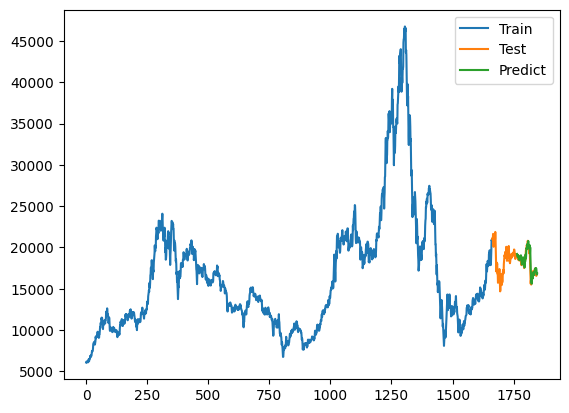

In [46]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
plt.legend(['Train','Test','Predict'])
plt.show()

In [47]:
# prompt: print RMSE, MAPE, MAE using lib

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
print("RMSE:", rmse)


# Calculate MAE
mae = mean_absolute_error(ytest, y_pred)
print("MAE:", mae)

# Calculate MAPE
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE:", mape)


RMSE: 18358.73931594549
MAE: 18316.15765818841
MAPE: 61667.51258581383
